<a href="https://colab.research.google.com/github/rohitrwt73/Phishing-Attack-Detection/blob/main/phishing_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Phishing is a cyberthreat that is defined by the use of deceptive techniques to trick people into revealing personal information. Cybercriminals frequently employ emails, chats, and websites to pose as reliable companies in an attempt to deceive people into disclosing personal information like passwords or bank account information. Two popular phishing strategies include clone phishing, which involves replicating reliable websites, and email phishing, which involves sending fake emails that look like they are from reputable sources. Phishing's main goal is to take advantage of people's confidence in order to get illegal access or carry out fraudulent operations. Online security depends on being able to identify and steer clear of phishing attempts, which frequently calls for caution and the use of preventive measures like multi-factor authentication.

# **Loading required Libraries**

In [ ]:
import plotly_express as px
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

# **Loading a dataset**

In [ ]:
# Loading the data from a csv file
dataframe= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset.csv')
dataframe.head(10)

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
5,nypost.com,0,0,1,4,0,0,1,0,0,1,1,1,0,0,1,0,0
6,kienthuc.net.vn,0,0,1,2,0,0,0,0,1,1,1,1,0,0,1,0,0
7,thenextweb.com,0,0,1,6,0,0,0,0,0,1,0,0,0,0,1,0,0
8,tobogo.net,0,0,1,2,0,0,0,0,0,1,0,0,0,0,1,0,0
9,akhbarelyom.com,0,0,1,5,0,0,0,0,0,1,0,1,0,0,1,0,0


In [ ]:
dataframe['Label'].value_counts()

0    5000
1    5000
Name: Label, dtype: int64

In [ ]:
dataframe.shape

(10000, 18)

OBSERVATIONS:

1.There are 10000 instances and 17 features (as total columns are 18) in dataset.

2.Out of which 16 are independent features where as 1 is dependent feature(i.e. label).

3.The datatype used in the features is int, so there is no need to use LabelEncoder.

4.There is no missing value in dataset.

In [ ]:
#shows the rows index in the dataset
dataframe.index

RangeIndex(start=0, stop=10000, step=1)

In [ ]:
#shows the column index in dataset
dataframe.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')

# **Display an overview of dataset**

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         10000 non-null  object
 1   Have_IP        10000 non-null  int64 
 2   Have_At        10000 non-null  int64 
 3   URL_Length     10000 non-null  int64 
 4   URL_Depth      10000 non-null  int64 
 5   Redirection    10000 non-null  int64 
 6   https_Domain   10000 non-null  int64 
 7   TinyURL        10000 non-null  int64 
 8   Prefix/Suffix  10000 non-null  int64 
 9   DNS_Record     10000 non-null  int64 
 10  Web_Traffic    10000 non-null  int64 
 11  Domain_Age     10000 non-null  int64 
 12  Domain_End     10000 non-null  int64 
 13  iFrame         10000 non-null  int64 
 14  Mouse_Over     10000 non-null  int64 
 15  Right_Click    10000 non-null  int64 
 16  Web_Forwards   10000 non-null  int64 
 17  Label          10000 non-null  int64 
dtypes: int64(17), object(1)
mem

This shows that all the values are integers

In [ ]:
dataframe.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000
mean,0.005500,0.022600,0.773400,3.072000,0.013500,0.000200,0.090300,0.093200,0.100800,0.845700,0.413700,0.8099,0.090900,0.06660,0.99930,0.105300,0.500000
std,0.073961,0.148632,0.418653,2.128631,0.115408,0.014141,0.286625,0.290727,0.301079,0.361254,0.492521,0.3924,0.287481,0.24934,0.02645,0.306955,0.500025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.500000
75%,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0000,0.000000,0.00000,1.00000,0.000000,1.000000
max,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.00000,1.00000,1.000000,1.000000


The dataframe.nunique() method is used to get the number of unique values for each column in the dataset.

In [ ]:
dataframe.nunique()

Domain           3553
Have_IP             2
Have_At             2
URL_Length          2
URL_Depth          18
Redirection         2
https_Domain        2
TinyURL             2
Prefix/Suffix       2
DNS_Record          2
Web_Traffic         2
Domain_Age          2
Domain_End          2
iFrame              2
Mouse_Over          2
Right_Click         2
Web_Forwards        2
Label               2
dtype: int64

The dataframe.isnull().sum() method is used to return the sum of null values in each row.

In [ ]:
dataframe.isnull().sum()

Domain           0
Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Web_Traffic      0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64

There is no NULL value in the dataset.

# **Visualize phishing distribution**

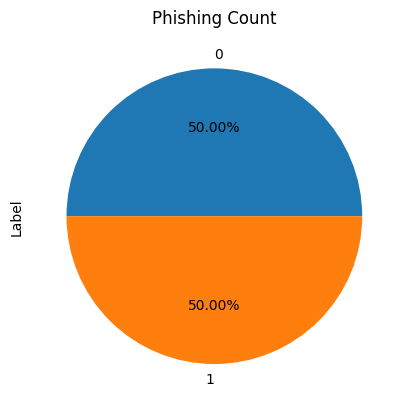

In [ ]:
dataframe['Label'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()

The pie-chart shows that there are equal number of phishing and non-phishing websites.

# **Visualize selected features**

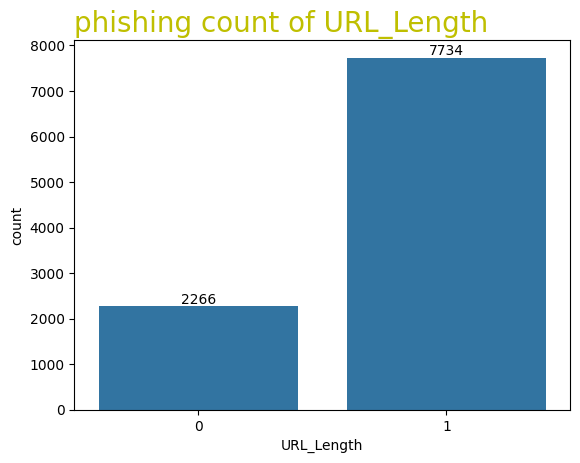

In [ ]:
count=sns.countplot(x=dataframe.URL_Length,data=dataframe)
for i in count.containers:
    count.bar_label(i)
plt.title("phishing count of URL_Length",color='y',size=20,loc='left')
plt.show()

In URL_Length ,phishing URLS are 7734.

Non-phishing URLS are 2266.

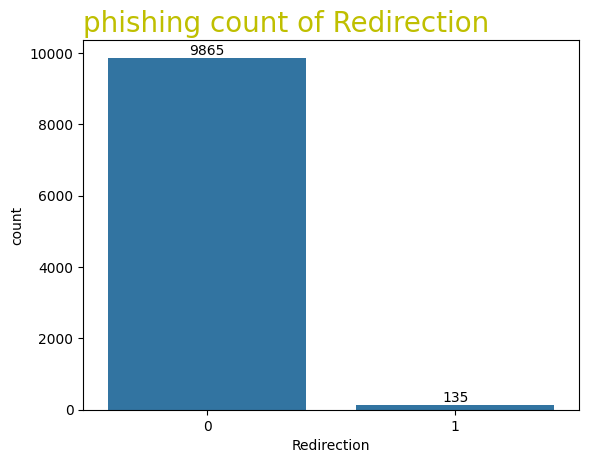

In [ ]:
count=sns.countplot(x=dataframe.Redirection,data=dataframe)
for i in count.containers:
    count.bar_label(i)
plt.title("phishing count of Redirection",color='y',size=20,loc='left')
plt.show()

In Redirection ,phishing URLS are 135.

Non-phishing URLS are 9865.

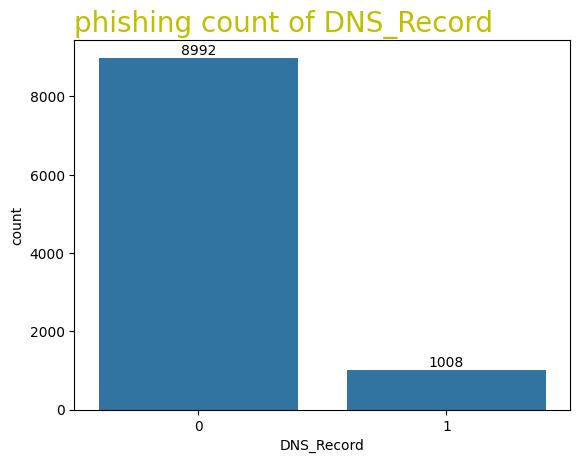

In [ ]:
count=sns.countplot(x=dataframe.DNS_Record,data=dataframe)
for i in count.containers:
    count.bar_label(i)
plt.title("phishing count of DNS_Record",color='y',size=20,loc='left')
plt.show()

In DNS_Record ,phishing URLS are 1008.

Non-phishing URLS are 8992.

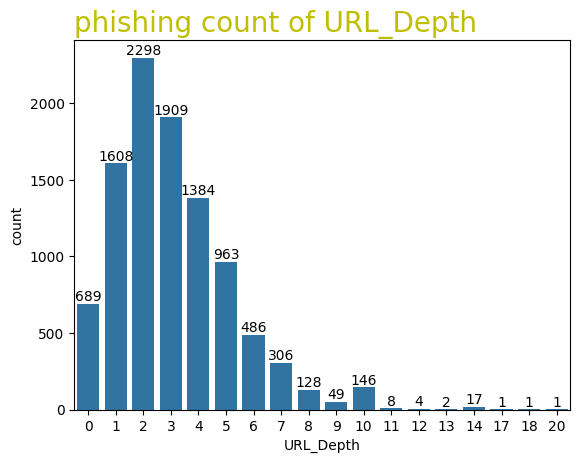

In [ ]:
count=sns.countplot(x=dataframe.URL_Depth,data=dataframe)
for i in count.containers:
    count.bar_label(i)
plt.title("phishing count of URL_Depth",color='y',size=20,loc='left')
plt.show()

In [ ]:
count=dataframe['Domain']
print("The number of URLs are:",len(count)) #returns no. of urls

The number of URLs are: 10000


# **# Split the dataset into features (X) and target (y)**

In [ ]:
y = dataframe['Label']
X = dataframe.drop(['Label', 'Domain'], axis=1)

Now let us split the dataset into training and testing sets, a crucial step in machine learning model development. The variables X_train and X_test represent the feature matrices for the training and testing sets, respectively, while y_train and y_test represent the corresponding target labels. The train_test_split function from the scikit-learn library is used for this purpose. The X and y variables contain the entire dataset's features and labels, respectively. The test_size parameter is set to 0.25, indicating that 25% of the data will be allocated to the testing set, while the remaining 75% will be used for training.

# **Split the dataset into train and test sets**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

# **Display counts of training and testing data**

In [ ]:
Train=len(X_train)
test=len(X_test)
print("Count of Training data:", Train)
print("Count of Testing data:", test)

Count of Training data: 7500
Count of Testing data: 2500




1. **Identifying Feature Types:**
   - `X` is assumed to be the feature matrix of the dataset.
   - `num_features` are the numeric features, selected by identifying columns with data types 'int64' and 'float64'.
   - `cat_features` are the categorical features, selected by identifying columns with the 'object' data type.

2. **Numeric Transformer Pipeline:**
   - `num_transformer` is a pipeline for preprocessing numeric features.
   - It consists of two steps:
      - `SimpleImputer`: This step fills missing values in numeric features with the mean of the respective columns.
      - `StandardScaler`: This step standardizes (scales) the numeric features to have zero mean and unit variance.

3. **Categorical Transformer Pipeline:**
   - `cat_transformer` is a pipeline for preprocessing categorical features.
   - It consists of two steps:
      - `SimpleImputer`: This step fills missing values in categorical features with the most frequent value of the respective columns.
      - `OneHotEncoder`: This step performs one-hot encoding on categorical features, converting them into binary vectors.

4. **Column Transformer:**
   - `preprocessor` is a `ColumnTransformer` that applies different transformers to different subsets of features.
   - For numeric features (`'num'`), it applies the `num_transformer` pipeline.
   - For categorical features (`'cat'`), it applies the `cat_transformer` pipeline.
   - This allows handling numeric and categorical features differently during the preprocessing phase.


In [ ]:
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

num_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ])

Creating and training a machine learning pipeline that consists of a Decision Tree Classifier.

1. **Decision Tree Model Initialization:**
   - `decision_tree_model` is an instance of the `DecisionTreeClassifier` class from scikit-learn.
   - The parameter `max_depth=5` sets the maximum depth of the decision tree, controlling the level of complexity to prevent overfitting.

2. **Pipeline Construction:**
   - `pipe` is a machine learning pipeline created using the `Pipeline` class from scikit-learn.
   - The pipeline is composed of two main steps:
      - **Preprocessing (`'preprocessor'`):** This step involves the preprocessing transformations defined earlier using the `ColumnTransformer` (`preprocessor`).
      - **Classifier (`'classifier'`):** This step is the decision tree classifier (`decision_tree_model`).

3. **Fitting the Model:**
   - The `fit` method is called on the pipeline (`pipe`) to train the entire model.
   - The training data (`X_train` and `y_train`) are passed to the pipeline for both preprocessing and model training.
   - During training, the data is first preprocessed based on the defined transformers, and then the decision tree model is fitted to the preprocessed data.


In [ ]:
decision_tree_model = DecisionTreeClassifier(max_depth=5)
pipe = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', decision_tree_model)])
# Fitting the model with training data
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Have_IP', 'Have_At', 'URL_Length', 'URL_Depth', 'Redirection',
       'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record', 'Web_Traffic',
       'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over', 'Right_Click',
       'Web_Forwards'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index([], dtype='object'))])),
                ('classifier', DecisionTreeClassifier(max_depth=5))])

In [ ]:
# Predicting the target value for test data
predicted_labels = pipe.predict(X_test)
# Computing the accuracy of the model performance
test_accuracy = accuracy_score(y_test,predicted_labels)
print("Model Performance: Accuracy on Test Data: {:.2f}".format(test_accuracy))


Model Performance: Accuracy on Test Data: 0.81


# **Visualizing predicted label distribution**

In [ ]:
fig = px.histogram(pd.DataFrame({'Predicted_Label': predicted_labels}), x="Predicted_Label",
                   color="Predicted_Label", color_discrete_sequence=["#871fff", "#ffa78c"])
fig.show()


In [ ]:
new_dataFrame= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset.csv')
n=int(input('Input the row number to check : '))
n=n-1
nth_url=new_dataFrame['Domain'].iloc[n]
new_url = pd.DataFrame({'Have_IP': [new_dataFrame['Have_IP'].iloc[n]],
    'Have_At': [new_dataFrame['Have_At'].iloc[n]],
    'URL_Length': [new_dataFrame['URL_Length'].iloc[n]],
    'URL_Depth': [new_dataFrame['URL_Depth'].iloc[n]],
    'Redirection': [new_dataFrame['Redirection'].iloc[n]],
    'https_Domain': [new_dataFrame['https_Domain'].iloc[n]],
    'TinyURL': [new_dataFrame['TinyURL'].iloc[n]],
    'Prefix/Suffix': [new_dataFrame['Prefix/Suffix'].iloc[n]],
    'DNS_Record': [new_dataFrame['DNS_Record'].iloc[n]],
    'Web_Traffic': [new_dataFrame['Web_Traffic'].iloc[n]],
    'Domain_Age': [new_dataFrame['Domain_Age'].iloc[n]],
    'Domain_End': [new_dataFrame['Domain_End'].iloc[n]],
    'iFrame': [new_dataFrame['iFrame'].iloc[n]],
    'Mouse_Over': [new_dataFrame['Mouse_Over'].iloc[n]],
    'Right_Click': [new_dataFrame['Right_Click'].iloc[n]],
    'Web_Forwards': [new_dataFrame['Web_Forwards'].iloc[n]]
})
# Rest of your code
result = pipe.predict(new_url)
if (result==1):
    print(nth_url," is a non-legitimate url")
else:
    print(nth_url," is a legitimate url")

Input the row number to check : 7755
alertastelecredito.site  is a non-legitimate url
